<a href="https://colab.research.google.com/github/sremirhn/DSPG-deneme-proje/blob/main/Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
pizza_data = pd.read_csv("pizza_v2.csv")

In [3]:
pizza_data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
pizza_data["price_rupiah"] = pizza_data["price_rupiah"].str.replace("Rp", "").str.replace(",", "").astype("float64")

In [6]:
pizza_data["diameter"] = pizza_data["diameter"].str.replace("inch", "").str.replace(",", "").astype("float64")

In [8]:
pizza_data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [9]:
pizza_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price_rupiah,129.0,87151.162791,44706.097732,23500.0,51000.0,78000.0,105000.0,248000.0
diameter,129.0,12.976744,3.272674,8.0,12.0,12.0,14.0,22.0


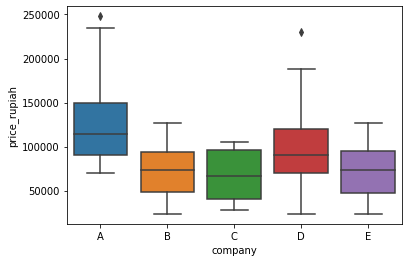

In [15]:
sns.boxplot(data=pizza_data,x=pizza_data["company"],y=pizza_data["price_rupiah"])

In [17]:
pizza_data.corr()

,price_rupiah,diameter
price_rupiah,1.000000,0.826977
diameter,0.826977,1.000000


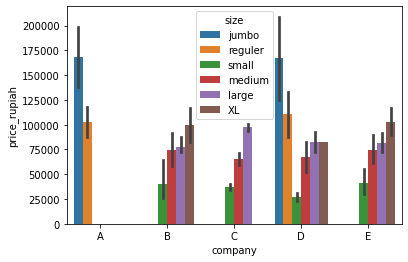

In [20]:
sns.barplot(x=pizza_data["company"],y=pizza_data["price_rupiah"],hue=pizza_data["size"])

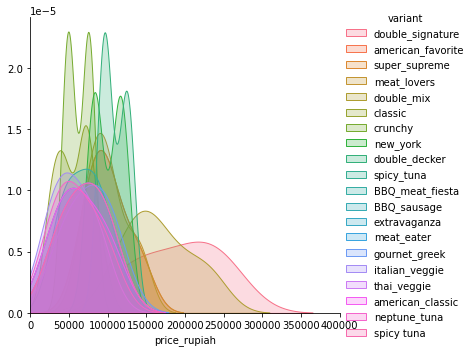

In [31]:
(sns.FacetGrid(pizza_data,
              hue="variant",
              height=5 ,xlim=(0,400000)).map(sns.kdeplot,"price_rupiah",shade=True).add_legend());

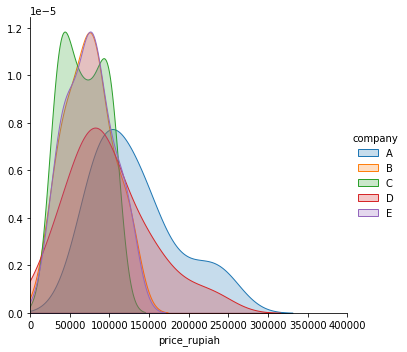

In [34]:
(sns.FacetGrid(pizza_data,
              hue="company",
              height=5 ,xlim=(0,400000)).map(sns.kdeplot,"price_rupiah",shade=True).add_legend());

In [35]:
from sklearn.preprocessing import LabelEncoder 

In [36]:
encoder = LabelEncoder() 

In [41]:
for i in pizza_data.columns:
  if pizza_data[i].dtype=="object":
    encoder.fit_transform(list(pizza_data[i].values))
    pizza_data[i] = encoder.transform(pizza_data[i].values)   

In [42]:
pizza_data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000.0,22.0,2,8,1,1,1,0
1,0,198000.0,20.0,7,8,1,1,1,0
2,0,120000.0,16.0,5,8,4,1,1,1
3,0,155000.0,14.0,9,8,4,1,0,1
4,0,248000.0,18.0,4,8,1,1,0,1


In [45]:
for k in pizza_data.columns:
  if pizza_data[k].dtype=="int":
    pizza_data[k]=pizza_data[k].astype("float64")

In [46]:
pizza_data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0.0,235000.0,22.0,2.0,8.0,1.0,1.0,1.0,0.0
1,0.0,198000.0,20.0,7.0,8.0,1.0,1.0,1.0,0.0
2,0.0,120000.0,16.0,5.0,8.0,4.0,1.0,1.0,1.0
3,0.0,155000.0,14.0,9.0,8.0,4.0,1.0,0.0,1.0
4,0.0,248000.0,18.0,4.0,8.0,1.0,1.0,0.0,1.0


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

In [48]:
X=pizza_data.drop(columns=["price_rupiah"])
y=pizza_data["price_rupiah"]

In [56]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [173]:
pipe= Pipeline([ 
    ('scaler', StandardScaler()),
    ('transformer', QuantileTransformer())
])
pipe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (90). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('transformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000))],
         verbose=False)

In [174]:
rf=RandomForestRegressor().fit(X_train,y_train)

In [87]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [82]:
from sklearn.model_selection import cross_val_score

In [175]:
rf.score(X_train,y_train)

0.9774084876943823

In [176]:
cross_val_score(rf,X_train,y_train,cv=10,scoring="r2").mean()

0.7935683892472776

In [85]:
rf_params= {"max_depth": list(range(1,10)),
             "max_features": [2,3,4,5,6],
            "n_estimators": [100,200,300,400,500,800] }

In [95]:
rf_cv_model=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1)

In [96]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [97]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 4, 'n_estimators': 100}

In [180]:
rf_tuned = RandomForestRegressor(max_depth=7,max_features=4,n_estimators=500).fit(X_train,y_train)

In [185]:
tr_pred=rf_tuned.predict(X_train)
ts_pred=rf_tuned.predict(x_test)

In [181]:
print(f"R2 score:{rf_tuned.score(X_train,y_train)}")


R2 score:0.9746561605105154


In [182]:
cross_val_score(rf_tuned,X_train,y_train,cv=10,scoring="r2").mean()

0.8123274891853975

In [183]:
from sklearn.metrics import mean_squared_error

In [187]:
print(f"RMSE Train:{np.sqrt(mean_squared_error(y_train,tr_pred))}")

RMSE Train:6200.681457573922


In [188]:
print(f"RMSE Test:{np.sqrt(mean_squared_error(y_test,ts_pred))}")

RMSE Test:17643.78546353323
